In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [201]:
car_df=pd.read_csv('data/cars.csv')
brand=pd.read_csv('data/brand.csv')

In [202]:
car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


In [203]:
brand

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States
5,volvo,Sweden
6,peugeot,France
7,bmw,Germany
8,citroen,France
9,mercedes-benz,Germany


In [204]:
#1. 데이터 전처리
#1.1. car_df, brand 병합
car_df['title'] = car_df['title'].str.lower()
car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,skoda fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,vauxhall corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,mini hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,vauxhall corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,renault megane,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,audi a4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,bmw 3 series,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,honda accord,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


In [205]:
car_df['title'].unique()

array(['skoda fabia', 'vauxhall corsa', 'hyundai i30', 'mini hatch',
       'hyundai coupe', 'ford focus', 'volvo 740', 'peugeot 207',
       'ford fiesta', 'vauxhall insignia', 'bmw 3 series', 'citroen c1',
       'citroen c4', 'vauxhall astra', 'ford mondeo',
       'mercedes-benz a180', 'peugeot 407', 'ford ka',
       'mercedes-benz a class', 'mazda mazda2', 'saab 9-3',
       'volkswagen polo', 'bmw 1 series', 'honda accord',
       'volkswagen beetle', 'mg mg6', 'ford c-max', 'honda civic',
       'toyota auris', 'volvo s40', 'seat ibiza', 'peugeot 308',
       'vauxhall meriva', 'mercedes-benz b class', 'mazda mazda3',
       'nissan 350 z', 'alfa romeo mito', 'renault fluence',
       'volkswagen passat', 'kia sportage', 'citroen xm',
       'vauxhall antara', 'nissan note', 'bmw 5 series', 'honda cr-v',
       'proton savvy', 'nissan micra', 'fiat panda', 'renault megane',
       'renault clio', 'hyundai i20', 'citroen c3', 'audi a6 saloon',
       'toyota yaris', 'fiat 500', 

In [206]:
brand['title'].unique

<bound method Series.unique of 0             skoda
1          vauxhall
2           hyundai
3              mini
4              ford
5             volvo
6           peugeot
7               bmw
8           citroen
9     mercedes-benz
10            mazda
11             saab
12       volkswagen
13            honda
14               mg
15           toyota
16             seat
17           nissan
18             alfa
19          renault
20              kia
21           proton
22             fiat
23             audi
24       mitsubishi
25            lexus
26             land
27        chevrolet
28           suzuki
29            dacia
30         daihatsu
31             jeep
32           jaguar
33         chrysler
34            rover
35               ds
36           daewoo
37            dodge
38          porsche
39           subaru
40         infiniti
41           abarth
42            smart
43           marcos
44         maserati
45        ssangyong
46          lagonda
47            isuzu
Name: tit

In [207]:
car_df['title'] = car_df['title'].str.split(' ').str[0]

In [208]:
df=car_df.merge(brand, on='title')
df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,skoda,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Czech Republic
1,skoda,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Czech Republic
2,skoda,1990,150000,2007,2.0,Diesel,Hatchback,1.9L,Manual,5.0,5.0,Euro 4,Full,Czech Republic
3,skoda,1995,84000,2008,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,NaN,Czech Republic
4,skoda,2495,124138,2011,3.0,Petrol,Hatchback,1.2L,Automatic,5.0,5.0,Euro 5,NaN,Czech Republic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,maserati,10000,72000,2009,3.0,Petrol,Saloon,4.2L,Automatic,4.0,5.0,Euro 4,Full,Italy
3683,ssangyong,12995,42771,2018,2.0,Diesel,SUV,2.2L,Automatic,5.0,5.0,Euro 6,NaN,South Korea
3684,ssangyong,4277,82400,2013,NaN,Diesel,SUV,2.0L,Automatic,5.0,5.0,Euro 5,Full,South Korea
3685,lagonda,14995,84000,1953,NaN,Petrol,Saloon,2.6L,Manual,4.0,NaN,NaN,NaN,United Kingdom


In [209]:
#1.2. 카테고리형 변수를 숫자 형태로 변환
df.info() #Engine, Emission Class

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
 13  country            3687 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 432.1+ KB


In [210]:
df['Engine'].unique

<bound method Series.unique of 0       1.4L
1       1.4L
2       1.9L
3       1.4L
4       1.2L
        ... 
3682    4.2L
3683    2.2L
3684    2.0L
3685    2.6L
3686     NaN
Name: Engine, Length: 3687, dtype: object>

In [211]:
df['Engine'] = df['Engine'].str.rstrip('L').astype(float)

In [212]:
df['Emission Class'].unique

<bound method Series.unique of 0       Euro 6
1       Euro 6
2       Euro 4
3       Euro 4
4       Euro 5
         ...  
3682    Euro 4
3683    Euro 6
3684    Euro 5
3685       NaN
3686       NaN
Name: Emission Class, Length: 3687, dtype: object>

In [213]:
df['Emission Class'] = df['Emission Class'].str.lstrip('Euro ').astype(float)

In [214]:
#1.3. 결측치 처리
    #Service hisrtory 결측치는 Unknown
    #결측치가 일정 개수 이상 포함된 데이터는 제거

In [215]:
df['Service history'].isna().sum()

3147

In [216]:
df['Service history']=df['Service history'].fillna('Unknown')
df['Service history'].unique()

array(['Unknown', 'Full'], dtype=object)

In [217]:
df.isna().mean()

#Previous Owners > 결측치 비율이 0.38로 열 자체를 제거해도 무방하다고 판단
#이외의 변수들의 결측치 비율은 매우 낮다고 판단하여 결측치 제거

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.382696
Fuel type            0.000000
Body type            0.000000
Engine               0.012205
Gearbox              0.000000
Doors                0.006781
Seats                0.009493
Emission Class       0.023596
Service history      0.000000
country              0.000000
dtype: float64

In [218]:
df.drop('Previous Owners', axis=1, inplace=True)

In [219]:
df.describe()

,Price,Mileage(miles),Registration_Year,Engine,Doors,Seats,Emission Class
count,3687.000000,3.687000e+03,3687.000000,3642.000000,3662.000000,3652.000000,3600.000000
mean,5787.301058,8.132854e+04,2011.846216,1.606260,4.321409,4.900329,4.910000
std,4480.629885,3.941718e+04,5.082387,0.486584,0.986760,0.577046,0.910688
min,400.000000,1.000000e+00,1953.000000,0.800000,2.000000,2.000000,1.000000
25%,2490.000000,5.698400e+04,2008.000000,1.300000,3.000000,5.000000,4.000000
50%,4000.000000,8.000000e+04,2012.000000,1.600000,5.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,1.900000,5.000000,5.000000,6.000000
max,33900.000000,1.110100e+06,2025.000000,6.300000,5.000000,7.000000,6.000000


<AxesSubplot:ylabel='Price'>

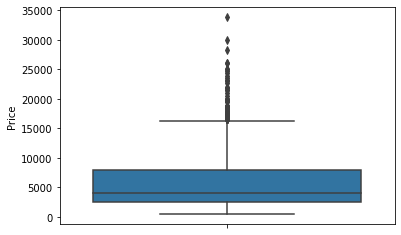

In [220]:
sns.boxplot(y=df['Price'])

In [221]:
df=df.dropna()
df

,title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,skoda,6900,70189,2016,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,Czech Republic
1,skoda,6900,70189,2016,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,Czech Republic
2,skoda,1990,150000,2007,Diesel,Hatchback,1.9,Manual,5.0,5.0,4.0,Full,Czech Republic
3,skoda,1995,84000,2008,Petrol,Hatchback,1.4,Manual,5.0,5.0,4.0,Unknown,Czech Republic
4,skoda,2495,124138,2011,Petrol,Hatchback,1.2,Automatic,5.0,5.0,5.0,Unknown,Czech Republic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,maserati,16000,66000,2008,Petrol,Coupe,4.2,Automatic,2.0,4.0,4.0,Full,Italy
3681,maserati,13900,63000,2014,Diesel,Saloon,3.0,Automatic,4.0,5.0,5.0,Unknown,Italy
3682,maserati,10000,72000,2009,Petrol,Saloon,4.2,Automatic,4.0,5.0,4.0,Full,Italy
3683,ssangyong,12995,42771,2018,Diesel,SUV,2.2,Automatic,5.0,5.0,6.0,Unknown,South Korea


In [222]:
#1.4. Scaler
# 인코딩

df.head()

,title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,skoda,6900,70189,2016,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,Czech Republic
1,skoda,6900,70189,2016,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,Czech Republic
2,skoda,1990,150000,2007,Diesel,Hatchback,1.9,Manual,5.0,5.0,4.0,Full,Czech Republic
3,skoda,1995,84000,2008,Petrol,Hatchback,1.4,Manual,5.0,5.0,4.0,Unknown,Czech Republic
4,skoda,2495,124138,2011,Petrol,Hatchback,1.2,Automatic,5.0,5.0,5.0,Unknown,Czech Republic


In [223]:
df_1=pd.get_dummies(df, columns=['Service history'], drop_first=True)
#unknown = 1

In [224]:
df[['Fuel type', 'Body type', 'Gearbox', 'country']].nunique()
#고유값이 많지 않다고 판단

Fuel type     5
Body type     9
Gearbox       2
country      12
dtype: int64

In [225]:
df_1=pd.get_dummies(df_1, columns=['title', 'Fuel type', 'Body type', 'Gearbox', 'country'], drop_first=True)

In [226]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

ss=StandardScaler()
rs=RobustScaler()
mm =MinMaxScaler()

In [227]:
ss_df_1=pd.DataFrame(ss.fit_transform(df_1), columns=df_1.columns)
rs_df_1=pd.DataFrame(rs.fit_transform(df_1), columns=df_1.columns)
mm_df_1=pd.DataFrame(mm.fit_transform(df_1), columns=df_1.columns)

#이상치가 있기 때문에 RobustScaler로 선택하는 것이 좋을 것이라 판단

In [228]:
#1.5. 기존 데이터의 정보 70% 이상을 가지는 수준에서 최소한의 PCA

from sklearn.decomposition import PCA

In [239]:
pca= PCA(n_components=0.70) #70% 이상
df_pca= pca.fit_transform(df_1)

df_pca = pd.DataFrame(df_pca)

print(df_pca.shape)
print("축소된 차원의 수:", pca.n_components_)
print("얼마나 설명하고 있는가:", sum(pca.explained_variance_ratio_))

#주성분 1개로 원본 데이터가 가진 정보(분산)의 99%를 설명

(3593, 1)
축소된 차원의 수: 1
얼마나 설명하고 있는가: 0.9904246081107574


In [238]:
rs_df_1pca= PCA(n_components=0.70) #70% 이상
rs_df_1pca= pca.fit_transform(rs_df_1)

rs_df_1pca = pd.DataFrame(rs_df_1pca)

print(rs_df_1pca.shape)
print("축소된 차원의 수:", pca.n_components_)
print("얼마나 설명하고 있는가:", sum(pca.explained_variance_ratio_))


#설명력이 더 낮아진 이유
    #스케일링을 하여 변수들이 공평한 조건에서 분산 계산됨
    #스케일링을 하지 않는 경우에는 한쪽으로 치우져서 계산될 수 있음

(3593, 8)
축소된 차원의 수: 8
얼마나 설명하고 있는가: 0.7143442505743426


In [184]:
#2. 분석
#2.1. 상관관계 해석

df.corr()

#높은 양의 상관관계
    #Registration_Year-Emission Class: 0.92
    #Price-Registration_Year: 0.79
    #Price-Emission class: 0.70
#높은 음의 상관관계
    #Price-Mileage(miles): -0.5

#최신 등록 차량일수록 높은 환경 등급을 가지는 경향을 보인다
#최신 등록 차량일수록 높은 가격을 가지는 경향을 보인다
#가격이 높을수록 높은 환경 등급을 가지는 경향을 보인다

#주행거리가 높을수록 가격은 낮아지는 경향을 보인다

,Price,Mileage(miles),Registration_Year,Engine,Doors,Seats,Emission Class
Price,1.000000,-0.503532,0.785830,-0.025522,0.113589,-0.024941,0.703709
Mileage(miles),-0.503532,1.000000,-0.445112,0.332797,-0.032997,0.095246,-0.380621
Registration_Year,0.785830,-0.445112,1.000000,-0.296129,0.213366,0.026654,0.918862
Engine,-0.025522,0.332797,-0.296129,1.000000,-0.060197,0.072513,-0.262521
Doors,0.113589,-0.032997,0.213366,-0.060197,1.000000,0.498437,0.177538
Seats,-0.024941,0.095246,0.026654,0.072513,0.498437,1.000000,0.022589
Emission Class,0.703709,-0.380621,0.918862,-0.262521,0.177538,0.022589,1.000000


In [185]:
#2.2. 국가별 총 브랜드 개수
case2=df.groupby('country')['title'].count()
case2=case2.sort_values(ascending=False)
print(case2)

#총 브랜드 개수 상위 5국가: Germany, United Kingdom, Japan, France, United States
#총 브랜드 개수 하위 5국가: Czech Republic, Spain, Sweden, Romania, Malaysia

country
Germany           842
United Kingdom    718
Japan             590
France            518
United States     437
South Korea       178
Italy             127
Czech Republic     63
Spain              59
Sweden             45
Romania            14
Malaysia            2
Name: title, dtype: int64


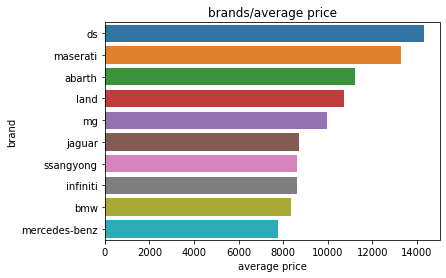

In [186]:
#2.3. 평균 가격이 높은 브랜드 상위 5곳은 어디인가
brands_price = df.groupby('title')['Price'].mean().sort_values(ascending=False).head(10)
#상위 10개만 출력

sns.barplot(x=brands_price.values, y=brands_price.index)
plt.title('brands/average price')
plt.xlabel('average price')
plt.ylabel('brand')
plt.show()

#평균 가격 상위 5곳: df, maserati, abarth, land, mg

Text(0.5, 1.0, 'price/fuel yype')

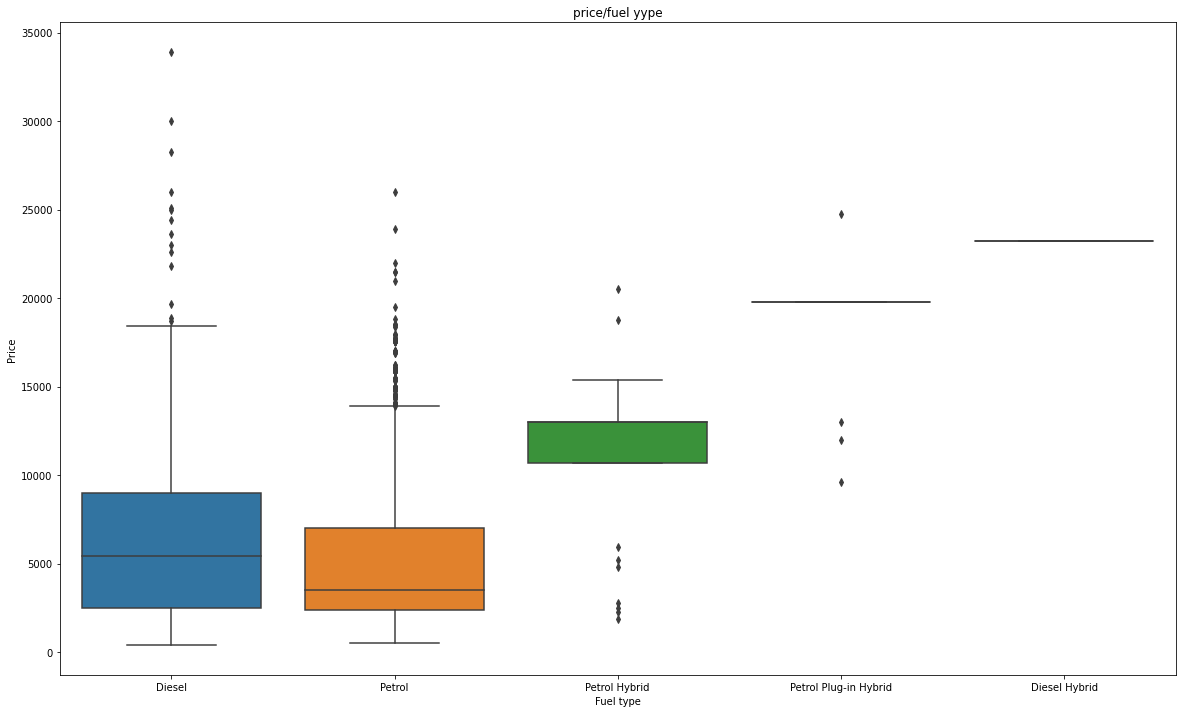

In [187]:
#2.4. 연료 종류에 따른 가격 차이

plt.figure(figsize=(20, 12))
sns.boxplot(x='Fuel type', y='Price', data=df)
plt.title('price/fuel yype')

#오른쪽으로 갈 수록(하이브리드일 수록) 중앙값이 커진다
#하이브리드 타입이 평균적으로 가격이 높은 경향을 보임

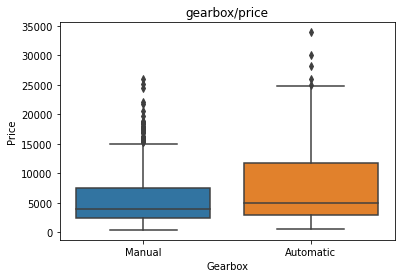

In [188]:
#2.5. 변속기와 가격간의 관계

sns.boxplot(x='Gearbox', y='Price', data=df)
plt.title('gearbox/price')
plt.show()


#중앙값은 Automatic이 더 높다
#Automatic이 좀 더 가격이 높은 경향을 보임

In [189]:
#2.6. 국가별 평균 주행거리가 높은 곳은 어디인가

case6 = df.groupby('country')['Mileage(miles)'].mean().sort_values(ascending=False)
print(case6.head())

#상위 5국가: Sseden, Germany, United States, Spain, Czech Republic

country
Sweden            131691.466667
Germany            90751.725653
United States      86904.032037
Spain              84795.559322
Czech Republic     83991.698413
Name: Mileage(miles), dtype: float64


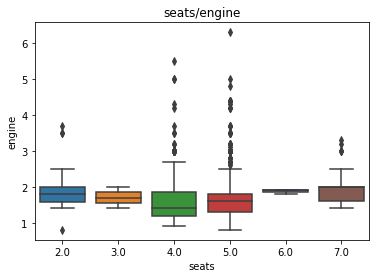

In [190]:
#2.7. 좌석 수가 많아질수록 연료량도 많아지는가


sns.boxplot(x='Seats', y='Engine', data=df)
plt.title('seats/engine')
plt.xlabel('seats')
plt.ylabel('engine')
plt.show()

#좌석 수 2, 3: 연료량의 변동이 작다
#좌석 수 4, 5: 연료량의 변동이 크다 > 엔진 크기가 다르다 > 다양한 종류의 크기를 가진 차가 있다
               #다양한 크기의 엔진이 있다
               #분산이 크기 때문에 다양성이 크다
#좌석 수 6, 7: 대체로 비슷한 정도의 연료량을 소모한다

In [191]:
#2.8. 연료량이 많은 국가
case8 = df.groupby('country')['Engine'].mean().sort_values(ascending=False)
print(case8.head())

#연료량 상위 5국가: Swedan, Germany, United Kindom, Japan, United States

country
Sweden            1.997778
Germany           1.870309
United Kingdom    1.579805
Japan             1.566441
United States     1.521510
Name: Engine, dtype: float64


In [192]:
#2.9. 환경등급이 높은 차량 종류

case9= df.groupby('Body type')['Emission Class'].mean().sort_values(ascending=False)
print(case9.head())

#환경등급 상위 5 차량 종류: Pickup, SUV, Estate, Coupe, Hatchback

Body type
Pickup       5.666667
SUV          5.228758
Estate       5.000000
Coupe        4.932331
Hatchback    4.918615
Name: Emission Class, dtype: float64


In [193]:
#2.10. 환경 등급(평균)이 높은 브랜드
case10= df.groupby('title')['Emission Class'].mean().sort_values(ascending=False)
print(case10.head())

#환경등급 상위 5 브랜드: df, smart, dacia, abarth, ssangyong

title
ds           6.000000
smart        5.750000
dacia        5.714286
abarth       5.666667
ssangyong    5.500000
Name: Emission Class, dtype: float64


Germany           269
United Kingdom    240
France            188
Japan             150
United States     117
Name: country, dtype: int64


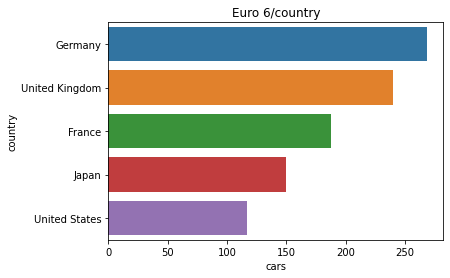

In [194]:
#2.11. 환경등급이 높은 차량이 많은 국가(상위 5국가)
# Emission Class=6.0 필터링
case11 = df[df['Emission Class'] >= 6.0]['country'].value_counts()
print(case11.head())


sns.barplot(x=case11.head().values, y=case11.head().index)
plt.title('Euro 6/country')
plt.xlabel('cars')
plt.ylabel('country')
plt.show()

#환경등급이 높은 차량이 많은 국가는 Gemany, United Kingdom, France, Japan, United Staes 순이다

In [195]:
#2.12. 국가 별로 많은 차종 상위 3개의 평균 가격

all_country = df['country'].unique() #전체 국가 목록
for country_name in all_country:
    country_df = df[df['country'] == country_name] #전체 데이터에서 한 국가의 데이터만 따로 저장
    bobytype3 = country_df['Body type'].value_counts().head(3) #해당 국가에서 Boby type이 많은 3개만 저장
    print(f"{country_name}")

    for bodytypename, count in bobytype3.items():
        car_data = country_df[country_df['Body type'] == body_type_name] #차종만 출력
        avg_price = car_data['Price'].mean() #차종의 평균 가격
        print(f"차종: {bodytypename}, 개수: {count}, 평균 가격: {avg_price:,.4f}")
        
#모든 국가에서 공통적으로 Hatchback는 상위 3개에 포함됨
#평균 가격이 높은 국가는 Romania
#상위 1의 차종이 많은 국가는 United Kingdom

Czech Republic
차종: Hatchback, 개수: 45, 평균 가격: 14,326.3333
차종: Estate, 개수: 11, 평균 가격: 14,326.3333
차종: SUV, 개수: 3, 평균 가격: 14,326.3333
United Kingdom
차종: Hatchback, 개수: 533, 평균 가격: 10,558.5758
차종: SUV, 개수: 66, 평균 가격: 10,558.5758
차종: MPV, 개수: 33, 평균 가격: 10,558.5758
South Korea
차종: Hatchback, 개수: 101, 평균 가격: 9,349.8197
차종: SUV, 개수: 61, 평균 가격: 9,349.8197
차종: Estate, 개수: 8, 평균 가격: 9,349.8197
United States
차종: Hatchback, 개수: 357, 평균 가격: 7,097.3333
차종: SUV, 개수: 36, 평균 가격: 7,097.3333
차종: MPV, 개수: 26, 평균 가격: 7,097.3333
Sweden
차종: Estate, 개수: 19, 평균 가격: 2,494.5000
차종: Saloon, 개수: 15, 평균 가격: 2,494.5000
차종: Hatchback, 개수: 4, 평균 가격: 2,494.5000
France
차종: Hatchback, 개수: 345, 평균 가격: 9,778.6522
차종: SUV, 개수: 46, 평균 가격: 9,778.6522
차종: MPV, 개수: 45, 평균 가격: 9,778.6522
Germany
차종: Hatchback, 개수: 337, 평균 가격: 10,973.6184
차종: Saloon, 개수: 239, 평균 가격: 10,973.6184
차종: Coupe, 개수: 94, 평균 가격: 10,973.6184
Japan
차종: Hatchback, 개수: 350, 평균 가격: 6,628.1687
차종: SUV, 개수: 160, 평균 가격: 6,628.1687
차종: Saloon, 개수: 36, 평균 가격: 6,628

In [196]:
#2.13. Registration이 빠를수록 Service history가 많은가

df['Registration_Year'].unique()

array([2016, 2007, 2008, 2011, 2003, 2010, 2005, 2015, 2014, 2012, 2004,
       2013, 2017, 2006, 2009, 2020, 2018, 2019, 2001, 2002, 2021, 1998,
       1997, 2022, 1999, 2000, 1993, 2023])

/tmp/ipykernel_55/962366984.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_year'] = df['Registration_Year'].apply(case13_year)


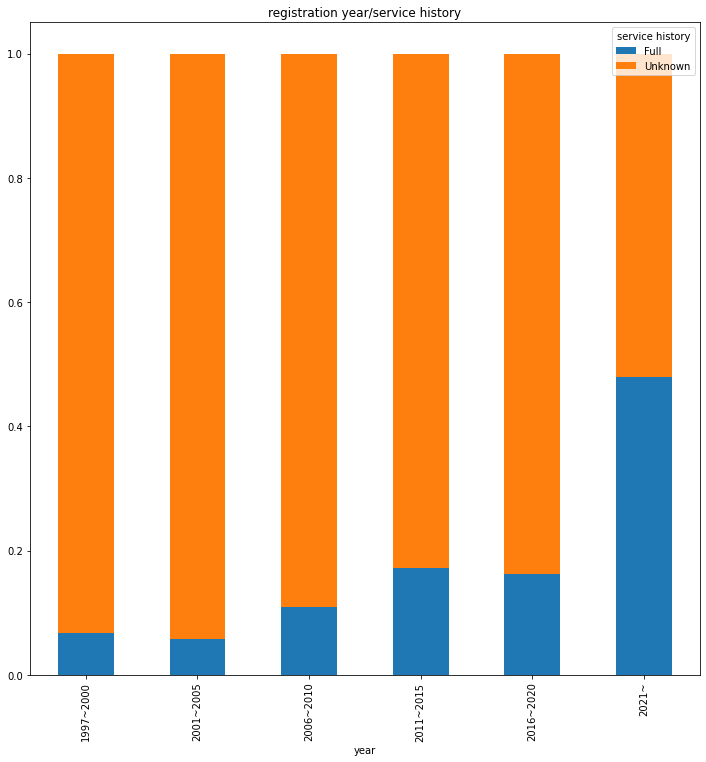

In [197]:
#연도의 수가 많으므로 구간으로 나눔
def case13_year(year):
    if year<=2000:
        return '1997~2000'
    elif 2001<=year<=2005:
        return '2001~2005'
    elif 2006 <= year <= 2010:
        return '2006~2010'
    elif 2011 <= year <= 2015:
        return '2011~2015'
    elif 2016 <= year <= 2020:
        return '2016~2020'
    else:
        return '2021~'

df['new_year'] = df['Registration_Year'].apply(case13_year)

#new_year별로 Service history의 비율 계산.
#normalize='index'는 각 행(연도 구간)의 합계가 1(100%)이 되도록 비율로 계산
case13_df = pd.crosstab(df['new_year'], df['Service history'], normalize='index')


#stacked=True > 누적 막대그래프
case13_df.plot(kind='bar', 
                 stacked=True,
                figsize=(12, 12))

plt.title('registration year/service history')
plt.xlabel('year')
plt.legend(title='service history')
plt.show()

#full: 서비스 기록 있음

# ~2010: full이 현저히 적다
# 2011~: full이 점진적으로 증가

#최신 차량일수록 서비스 히스토리가 full인 경우가 많다

#중고차 데이터이므로 중고차를 산다 > 서비스 기록을 확인해야 한다 > 최신 등록 차량일수록 서비스 기록이 되어있을 확률이 높다

#

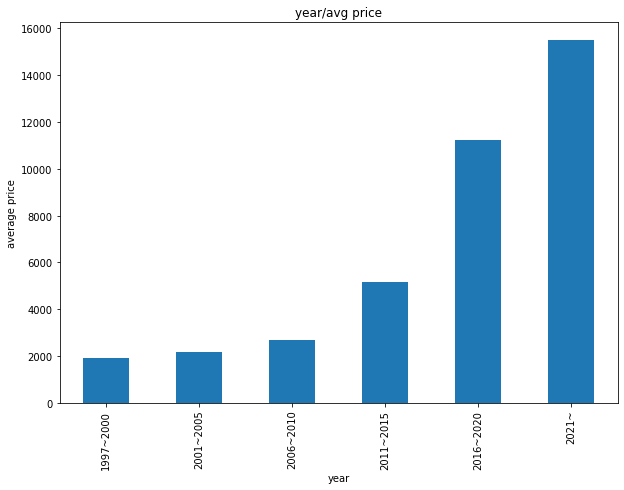

In [198]:
#2.14. 연도 별로 자동차의 가격이 높아지는가

avg_price= df.groupby('new_year')['Price'].mean()
avg_price = avg_price.sort_index()

avg_price.plot(kind='bar',
                       figsize=(10, 7))

plt.title('year/avg price')
plt.xlabel('year')
plt.ylabel('average price')
plt.show()

#해가 늘어날 수록 평균 가격을 높아짐

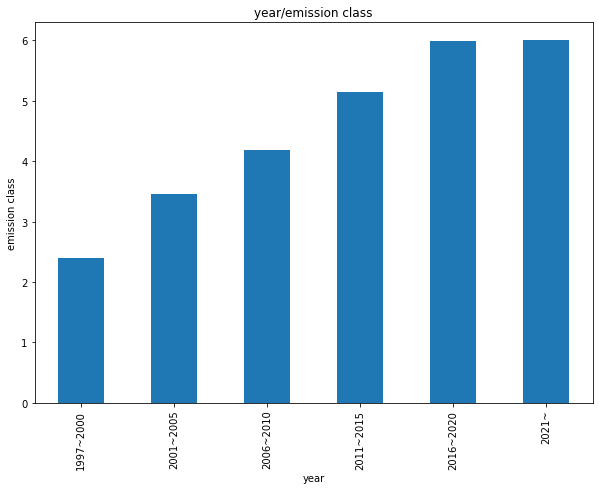

In [199]:
#2.15. 연도 별로 자동차의 환경 등급이 높아지는가

avg_class= df.groupby('new_year')['Emission Class'].mean()
avg_class =avg_class.sort_index()

avg_class.plot(kind='bar',figsize=(10, 7))

plt.title('year/emission class')
plt.xlabel('year')
plt.ylabel('emission class')
plt.show()

#해가 증가할 수록 환경 등급이 높아진다
#2010년대 후반에서 2021년 이후는 큰 변화는 없다